# Data Acquisition

In [25]:
# import the necessary library
import sqlite3,csv
import pandas as pd
import numpy as np

In [26]:
# import the file
path = 'C:/Users/ASUSTUF/Desktop/IBM review 1/Project Portfolio/Project 2/Data/insurance.csv'

#load the data path since it is download locally
data =pd.read_csv(path)

In [27]:
# check if the data is loaded successfully
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Data Preparation

Check if there is a missing data

In [28]:
#using the isnull function
missing_data = data.isnull()
missing_data.head()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [29]:
# make a for loop to iterate and identify the missing data

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

age
False    1338
Name: age, dtype: int64

sex
False    1338
Name: sex, dtype: int64

bmi
False    1338
Name: bmi, dtype: int64

children
False    1338
Name: children, dtype: int64

smoker
False    1338
Name: smoker, dtype: int64

region
False    1338
Name: region, dtype: int64

charges
False    1338
Name: charges, dtype: int64



From the results above it shows that there is no missing data in the data thus there is no need to replace the value the next process is to check the data type of each column to make sure it is converted to numerical value for further analysis.

In [30]:
# Check the type of data structure on the table
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Since the smoker and sex have an object data structure we could run into problem when we do the later analysis because only numerical value can be be use to analyze the data speciallay the regression model.

The solution for this is to use a dummy variable provided by pandas dataframe.


In [31]:
# show the list of columns
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [32]:
# get indicator variables and assign ti to dummy_1
dummy_1 = pd.get_dummies(data['sex'])
dummy_1.head(20)

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [33]:
#merge the dumm_1 and the data table
data = pd.concat([data,dummy_1], axis = 1)

In [34]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
5,31,female,25.740,0,no,southeast,3756.62160,1,0
6,46,female,33.440,1,no,southeast,8240.58960,1,0
7,37,female,27.740,3,no,northwest,7281.50560,1,0
8,37,male,29.830,2,no,northeast,6406.41070,0,1
9,60,female,25.840,0,no,northwest,28923.13692,1,0


In [35]:
# drop the sex and female and male column
data.drop("sex", axis =1, inplace = True)
data.head()

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [36]:
data.drop(["female","male"], axis =1, inplace = True)

In [37]:
data = pd.concat([data,dummy_1], axis = 1)
data.head()

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [38]:
# There is still some categorical data remaining that is the smoker lets convert it to numerical data using the get_dummies function of the panndas library

dummy_2 = pd.get_dummies(data['smoker'])
dummy_2.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [39]:
# merge the dummy_2 and data table

data = pd.concat([data,dummy_2],axis =1)

#drop the smoker column
data.drop('smoker',axis = 1, inplace = True)

data.head()

,age,bmi,children,region,charges,female,male,no,yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


In [40]:
# Let rename the no yes since the description is incomplete

data.rename(columns = {'no' : 'Smoker-no','yes':'Smoker-yes'},inplace = True)
data.head()

,age,bmi,children,region,charges,female,male,Smoker-no,Smoker-yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


In [41]:
# Lets drop the region since it has no use in further analysis
data.drop('region', axis = 1, inplace = True)
data.head()

,age,bmi,children,charges,female,male,Smoker-no,Smoker-yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0


Now that the data is clean and ready for further analysis its time to save it to sqlite3 database to avoid any changes and error during the EDA, model selection and further analysis.

In [42]:
# Lets create a database 

conn = sqlite3.connect('project_2.db')

cursor = conn.cursor()

In [43]:
# load the sql magic extension in jupyter
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [44]:
#connect to sql lite database
%sql sqlite:///project_2.db

In [ ]:
#save the Clean Dataset to sqlite for further analysis using the pandas.to_sql() function.
data.to_sql("data_2",conn, index = False, method = "multi")

In [83]:
# check if the 
%sql SELECT * FROM data_2 LIMIT 5;

 * sqlite:///project_2.db
Done.


age,bmi,children,charges,female,male,Smoker-no,Smoker-yes
19,27.9,0,16884.924,1,0,0,1
18,33.77,1,1725.5523,0,1,1,0
28,33.0,3,4449.462,0,1,1,0
33,22.705,0,21984.47061,0,1,1,0
32,28.88,0,3866.8552,0,1,1,0


In [ ]:
%sql SELECT bmi FROM data_2 LIMIT 5;

## Exploratory Data Analysis and Visualization

In [47]:
# Import the necessary module for the analysis
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [48]:
# Retrieve the data from from database using the sql query
data2 =%sql SELECT * FROM data_2;

 * sqlite:///project_2.db
Done.


In [49]:
#Convert the the sql format to Pandas Dataframe
data_orig =data2.DataFrame()

In [50]:
data_orig.head()

,age,bmi,children,charges,female,male,Smoker-no,Smoker-yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0


In [51]:
# Display the basic descriptive statistics
data_orig.describe()

,age,bmi,children,charges,female,male,Smoker-no,Smoker-yes
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [52]:
#Display the correlation among variables using the corr function
data_orig.corr()

,age,bmi,children,charges,female,male,Smoker-no,Smoker-yes
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251
female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185
male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185
Smoker-no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000
Smoker-yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000


In [55]:
data_5=pd.read_csv(path)

In [56]:
data_5.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Age vs Charges

<function matplotlib.pyplot.show(close=None, block=None)>

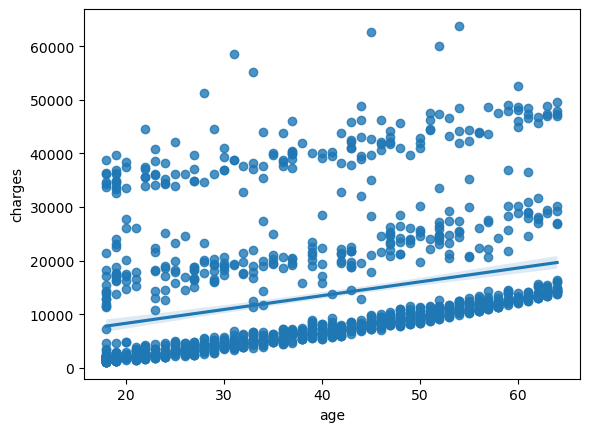

In [57]:
sns.regplot(x='age',y = 'charges', data = data_orig)
plt.show

In [66]:
data_orig[['age','charges']].corr()

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


BMI Vs Charge

<Axes: xlabel='bmi', ylabel='charges'>

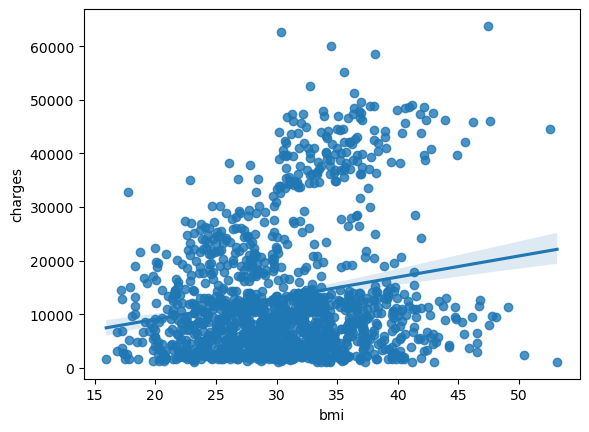

In [59]:
sns.regplot(x = 'bmi', y = 'charges', data = data_orig)

In [67]:
data_orig[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


BMI Vs Children

In [68]:
data_orig[['children','charges']].corr()

,children,charges
children,1.000000,0.067998
charges,0.067998,1.000000


### P - Value and Correlation Computation

In [71]:
from scipy import stats

In [72]:
pearson_coef, p_value = stats.pearsonr(data_orig['bmi'],data_orig['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef,'with a P-value of P =', p_value)

The Pearson Correlation Coefficient is 0.1983409688336289 with a P-value of P = 2.459085535117846e-13


From the result it the correl coefficient is close to zero implying there is a weak liner dependence on two variable  but the p value shows that the correlation between this two variables is significant.

In [73]:
pearson_coef, p_value = stats.pearsonr(data_orig['age'],data_orig['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef,'with a P-value of P =', p_value)

The Pearson Correlation Coefficient is 0.29900819333064765 with a P-value of P = 4.8866933317203816e-29


The result shows that the correlaction between two variable is 30% and the p_value is statistically significant.

### Visualization

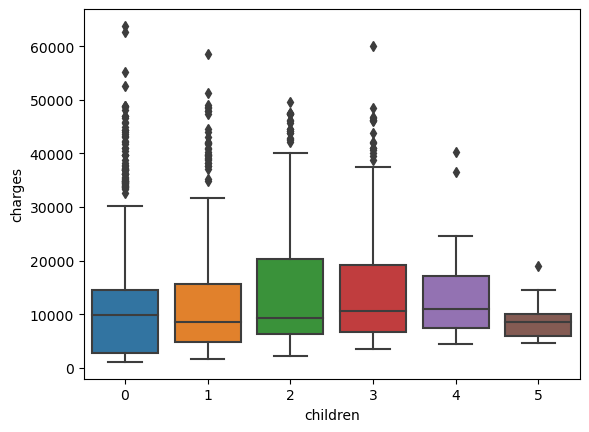

In [74]:
sns.boxplot(x = 'children', y = 'charges', data = data_orig)
plt.show()

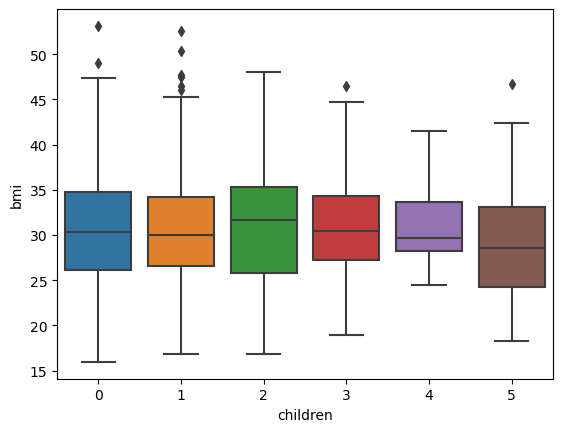

In [75]:
sns.boxplot(x = 'children', y = 'bmi', data = data_orig)
plt.show()

In [85]:
%sql SELECT * FROM data_2 limit 5;

 * sqlite:///project_2.db
Done.


age,bmi,children,charges,female,male,Smoker-no,Smoker-yes
19,27.9,0,16884.924,1,0,0,1
18,33.77,1,1725.5523,0,1,1,0
28,33.0,3,4449.462,0,1,1,0
33,22.705,0,21984.47061,0,1,1,0
32,28.88,0,3866.8552,0,1,1,0


In [91]:
%sql SELECT AVG(charges) FROM data_2 WHERE male == 1;

 * sqlite:///project_2.db
Done.


AVG(charges)
13956.751177721886


In [92]:
%sql SELECT AVG(charges) FROM data_2 Where female == 1;

 * sqlite:///project_2.db
Done.


AVG(charges)
12569.57884383534


In [95]:
histo = {'Gender': ['Male', 'Female'],'Charges':[13956.75,12569.57]}
df = pd.DataFrame(histo)

In [96]:
df.head()

,Gender,Charges
0,Male,13956.75
1,Female,12569.57
